In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
card_local = pd.read_csv('card_local.txt')
card_local['날짜'] = pd.to_datetime(card_local['날짜'], format='%Y%m%d')

In [3]:
cl_upjong = card_local.groupby(['기준년월','내국인업종코드']).카드이용금액계.mean().reset_index()

In [4]:
cl_upjong_2020 = cl_upjong.loc[cl_upjong['기준년월'] >= 202001].reset_index(drop=True)

In [11]:
cl_upjong_2020['Difference'] = cl_upjong_2020.iloc[:,2] - cl_upjong.iloc[63:819, 2].reset_index(drop=True)

In [15]:
cl_upjong_2020.groupby('내국인업종코드').Difference.mean().reset_index().sort_values('Difference').reset_index()

,index,내국인업종코드,Difference
0,0,SB001,-4.585159e+09
1,7,SB008,-1.724259e+09
2,11,SB012,-1.341547e+09
3,20,SB021,-1.282274e+09
4,46,SB047,-1.169106e+09
5,2,SB003,-8.253293e+08
6,34,SB035,-6.957195e+08
7,10,SB011,-6.548065e+08
8,37,SB038,-6.147535e+08
9,62,SB063,-6.012122e+08


In [17]:
upjong = pd.read_csv('TB_SHCARD_LOCAL_63UPJONG_DIM.txt', sep='|')
upjong.replace('\`','', regex = True, inplace=True)

In [18]:
upjong.to_csv('upjong.txt', index=False)

In [19]:
upjongdiff = cl_upjong_2020.groupby('내국인업종코드').Difference.mean().reset_index().sort_values('Difference').reset_index()

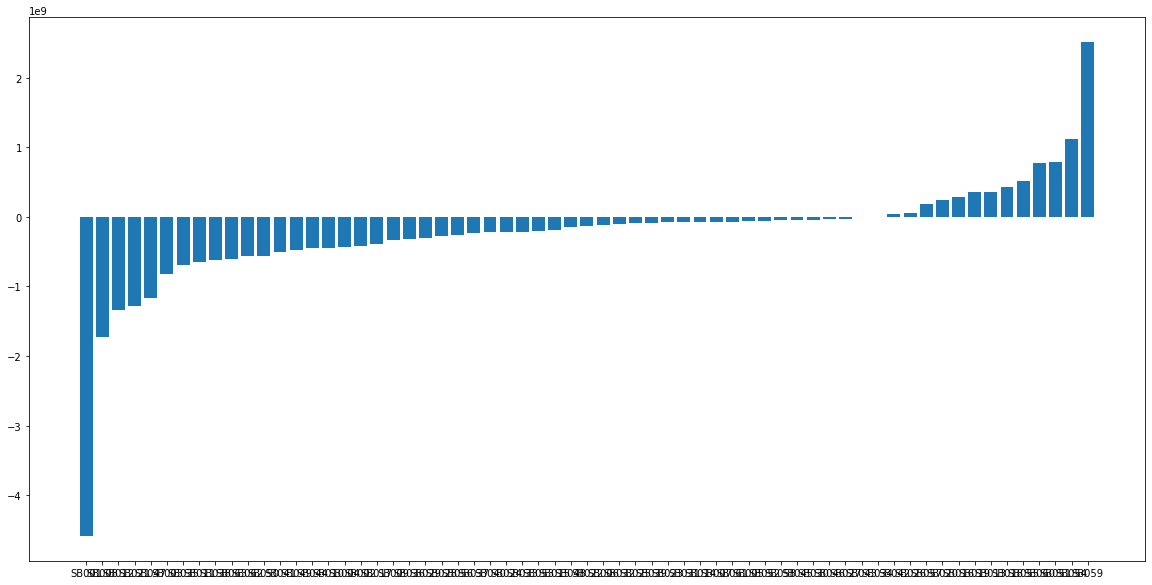

In [20]:
plt.figure(figsize = (20,10))
plt.bar(upjongdiff.iloc[:,1],upjongdiff.iloc[:,2])
plt.show()

In [21]:
card_local_pivoted = card_local.pivot(columns = '내국인업종코드', index = '날짜', values = '카드이용금액계')

In [22]:
card_local_pivoted_7days_rolling = card_local_pivoted.rolling(7).mean()
card_local_pivoted_30days_rolling = card_local_pivoted.rolling(30).mean()

In [23]:
card_local_pivoted_7days_rolling_2020 = card_local_pivoted_7days_rolling.loc[datetime(2020,1,1):]
card_local_pivoted_7days_rolling_2020.loc[datetime(2020,2,28)] = card_local_pivoted_7days_rolling_2020.loc[datetime(2020,2,28):datetime(2020,2,29)].mean().copy()
card_local_pivoted_7days_rolling_2020.drop(datetime(2020,2,29),inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [24]:
card_local_pivoted_30days_rolling_2020 = card_local_pivoted_30days_rolling.loc[datetime(2020,1,1):]
card_local_pivoted_30days_rolling_2020.loc[datetime(2020,2,28)] = card_local_pivoted_30days_rolling_2020.loc[datetime(2020,2,28):datetime(2020,2,29)].mean().copy()
card_local_pivoted_30days_rolling_2020.drop(datetime(2020,2,29),inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
card_local_pivoted_7days_rolling_difference = card_local_pivoted_7days_rolling_2020.subtract(card_local_pivoted_7days_rolling.loc[datetime(2019,1,1):datetime(2019,8,31)].reset_index(drop=True).to_numpy())
card_local_pivoted_7days_rolling_difference

내국인업종코드,SB001,SB002,SB003,SB004,SB005,SB006,SB007,SB008,SB009,SB010,...,SB054,SB055,SB056,SB057,SB058,SB059,SB060,SB061,SB062,SB063
날짜,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1.708102e+09,6.277451e+07,3.492836e+08,3.918879e+08,5.443960e+07,1.927733e+08,3.882784e+07,1.420662e+09,1.871699e+07,-2.251242e+08,...,6.504998e+08,9.719839e+08,1.139525e+08,8.608751e+07,4.718748e+07,1.663289e+09,2.831564e+09,-5.922576e+07,3.287814e+08,-1.039151e+09
2020-01-02,1.493476e+09,4.889747e+07,3.371247e+08,3.204058e+08,4.913732e+07,1.862285e+08,1.927709e+07,1.228760e+09,2.227709e+06,-2.110983e+08,...,6.470512e+08,8.454545e+08,2.969781e+07,7.732305e+07,-7.515069e+07,1.372091e+09,2.555013e+09,-1.270810e+08,4.344661e+08,-7.513424e+08
2020-01-03,1.257742e+09,5.674085e+06,2.891527e+08,3.414801e+08,2.424064e+07,1.684882e+08,7.379141e+06,1.018023e+09,-1.618125e+07,-1.715611e+08,...,6.233883e+08,9.110346e+08,4.058056e+07,6.381888e+07,-1.589098e+08,1.284818e+09,1.797117e+09,-1.802368e+08,4.882738e+08,-4.804453e+08
2020-01-04,1.925880e+09,5.989902e+07,3.190135e+08,4.933760e+08,1.025392e+08,1.692385e+08,3.386185e+07,9.596806e+08,-1.417835e+07,-1.588738e+08,...,6.553375e+08,1.192321e+09,1.069728e+08,6.032772e+07,-1.544831e+07,1.440527e+09,1.887697e+09,-8.426866e+07,6.226495e+08,4.703595e+07
2020-01-05,1.578333e+09,4.137994e+07,2.568334e+08,4.728804e+08,1.089946e+08,1.415107e+08,1.422547e+07,6.689612e+08,-2.241347e+06,-1.618454e+08,...,6.342440e+08,1.328349e+09,6.359863e+07,7.580550e+07,-3.192381e+07,1.423494e+09,1.903530e+09,-6.140099e+07,7.515279e+08,9.657153e+07
2020-01-06,-3.584004e+07,-2.272702e+08,-3.613794e+07,2.778080e+08,2.044841e+07,9.154265e+07,-2.962554e+07,-2.305794e+06,-3.036951e+07,-1.661297e+08,...,5.581573e+08,6.914707e+08,-1.644654e+08,2.391024e+07,-1.015119e+08,1.021982e+09,1.012793e+09,-1.733208e+08,6.982748e+08,4.519589e+07
2020-01-07,-4.695418e+08,-3.046376e+08,-2.265174e+08,2.103865e+08,1.141420e+07,6.536562e+07,-5.913854e+07,-2.525112e+08,-4.633135e+07,-2.331731e+08,...,4.805834e+08,3.950316e+08,-2.441863e+08,6.475552e+07,-1.283212e+08,7.700113e+08,4.158374e+08,-1.446112e+08,5.070028e+08,-5.218609e+07
2020-01-08,-6.527395e+08,-3.548628e+08,-2.726950e+08,1.789082e+08,2.635361e+07,6.551737e+07,-2.650906e+07,-2.371949e+08,-4.043729e+07,-2.793094e+08,...,4.876511e+08,4.581518e+08,-2.576057e+08,3.404430e+06,-2.175229e+08,1.332528e+09,4.920061e+08,-1.649085e+08,6.157359e+08,-2.421970e+08
2020-01-09,-4.793255e+08,-3.376368e+08,-3.239613e+08,1.955333e+08,2.673177e+07,6.981693e+07,-2.202042e+07,-1.262926e+08,-3.964526e+07,-3.305753e+08,...,4.916963e+08,2.747472e+08,-2.322558e+08,-4.620160e+07,-2.201327e+08,1.761223e+09,4.803494e+08,-1.134327e+08,7.659520e+08,-3.278463e+08


In [26]:
card_local_pivoted_30days_rolling_difference = card_local_pivoted_30days_rolling_2020.subtract(card_local_pivoted_30days_rolling.loc[datetime(2019,1,1):datetime(2019,8,31)].reset_index(drop=True).to_numpy())
card_local_pivoted_30days_rolling_difference

내국인업종코드,SB001,SB002,SB003,SB004,SB005,SB006,SB007,SB008,SB009,SB010,...,SB054,SB055,SB056,SB057,SB058,SB059,SB060,SB061,SB062,SB063
날짜,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1.985801e+09,8.492850e+07,2.027014e+08,3.683396e+08,1.737780e+07,1.961976e+08,6.941774e+07,1.472897e+09,1.218919e+07,-1.682323e+08,...,4.345664e+08,5.071632e+08,8.992738e+07,7.208004e+07,7.711336e+07,1.907104e+09,1.111420e+09,-6.097243e+07,2.732367e+08,-6.406331e+08
2020-01-02,1.805673e+09,5.007934e+07,1.873385e+08,3.484212e+08,1.120255e+07,1.862848e+08,6.324644e+07,1.377695e+09,2.945202e+06,-1.798757e+08,...,4.575052e+08,5.147090e+08,9.254319e+07,6.585519e+07,4.011084e+07,1.775896e+09,1.094184e+09,-8.013169e+07,2.486578e+08,-6.371754e+08
2020-01-03,1.815595e+09,5.753758e+07,1.990501e+08,3.555223e+08,2.727866e+07,1.868886e+08,6.232329e+07,1.417066e+09,1.024921e+07,-1.765022e+08,...,4.799393e+08,4.631049e+08,9.203691e+07,6.925660e+07,1.597774e+07,1.785201e+09,1.089668e+09,-8.238400e+07,3.033232e+08,-6.161585e+08
2020-01-04,1.452904e+09,2.977518e+07,2.102555e+08,3.095386e+08,2.891553e+07,1.713701e+08,6.303267e+07,1.360564e+09,1.905692e+07,-1.775897e+08,...,4.246618e+08,4.291983e+08,1.230171e+08,8.269106e+07,-1.648107e+07,1.717286e+09,1.038983e+09,-1.073763e+08,2.738747e+08,-6.170617e+08
2020-01-05,1.007014e+09,-3.299521e+07,1.342430e+08,2.681571e+08,3.715246e+05,1.529518e+08,5.105158e+07,1.045981e+09,-3.279648e+06,-2.067218e+08,...,3.100896e+08,4.503778e+08,8.083121e+07,9.471311e+07,-3.017208e+07,1.631471e+09,9.417483e+08,-1.545260e+08,2.204854e+08,-6.421737e+08
2020-01-06,1.561202e+09,2.144058e+07,1.118562e+08,3.200708e+08,1.059920e+07,1.730442e+08,2.928341e+07,1.063488e+09,-3.187599e+07,-2.130672e+08,...,5.811851e+08,5.418516e+08,5.650237e+07,7.073968e+07,6.426286e+07,1.763001e+09,1.090431e+09,-8.705349e+07,3.913984e+08,-5.923255e+08
2020-01-07,1.869858e+09,6.755978e+07,1.669486e+08,3.609104e+08,2.262941e+07,1.792275e+08,2.906400e+07,1.268119e+09,-3.546582e+05,-1.839394e+08,...,6.635313e+08,5.710415e+08,3.110789e+07,7.493066e+07,7.202185e+07,1.816441e+09,1.176752e+09,-5.101119e+07,4.371994e+08,-5.637318e+08
2020-01-08,1.412632e+09,-3.552542e+06,1.594809e+08,3.242557e+08,1.918150e+07,1.650427e+08,4.784148e+07,1.177426e+09,1.300703e+07,-1.961229e+08,...,4.427578e+08,5.710886e+08,7.048661e+06,8.226344e+07,-2.119015e+07,1.850124e+09,1.074943e+09,-1.170610e+08,3.979701e+08,-6.199194e+08
2020-01-09,1.308081e+09,-2.511172e+07,1.161680e+08,3.062529e+08,1.658748e+07,1.636940e+08,4.085279e+07,1.084386e+09,-1.991433e+06,-2.214639e+08,...,4.760847e+08,5.629457e+08,1.294658e+07,4.684776e+07,-4.318409e+07,1.846252e+09,1.073059e+09,-1.152042e+08,4.732995e+08,-6.187335e+08


In [27]:
cl_upjong_2020_monthly_difference = cl_upjong_2020.drop('카드이용금액계', 1)

In [28]:
cl_upjong_2020_monthly_difference.to_csv('upjong_2020_monthly_difference.txt', index = False)

In [29]:
card_local_pivoted_7days_rolling_difference.to_csv('card_local_pivoted_7days_rolling_difference.txt')
card_local_pivoted_30days_rolling_difference.to_csv('card_local_pivoted_30days_rolling_difference.txt')